# Align-it with pyalignit

This notebook demonstrates the usage of pyalignit, Python wrappers for the Align-it software.

> Align-it™ is a tool to align molecules according their pharmacophores. A pharmacophore is an abstract concept based on the specific interactions that have been observed in drug-receptor interactions: hydrogen bonding, charge transfer, electrostatic and hydrophobic interactions. Molecular modeling and/or screening based on pharmacophore similarities have proven to be an important and useful method in drug discovery.

Taken from the [Align-it](http://silicos-it.be.s3-website-eu-west-1.amazonaws.com/software/align-it/1.0.4/align-it.html) webpage.

#### Requirements:

- [rdkit](https://www.rdkit.org/)
- [matplotlib](https://matplotlib.org/)
- [py3Dmol](https://github.com/avirshup/py3dmol)


\*This notebook uses the same examples and some portions of code from the example notebook provided by [pyshapeit](https://github.com/rdkit/shape-it)

### Constructing an alignment with pyalignit:

In [1]:
import sys
import os

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import RDConfig

sys.path.append('..')

import pyalignit

import matplotlib.pyplot as plt
import py3Dmol

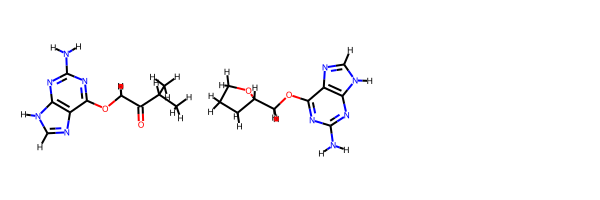

In [2]:
# Load CDK2 molecules
suppl = Chem.SDMolSupplier(os.path.join(RDConfig.RDDocsDir,'Book/data/cdk2.sdf'), removeHs=False)
mols = [mol for mol in suppl]     

# Draw the first two molecules
Draw.MolsToGridImage(mols[:2])

In [3]:
ref = mols[0]    # Reference molecule
probe = mols[1]  # Probe molecule

In [4]:
# Draw molecules before alignment
p = py3Dmol.view(width=600, height=300)
p.addModel(Chem.MolToMolBlock(ref), 'sdf')
p.addModel(Chem.MolToMolBlock(probe), 'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
(tanimoto, tversky_ref, tversky_probe) = pyalignit.AlignMol(ref, probe)

print(f"TANIMOTO: {tanimoto}\nTVERSKY_REF: {tversky_ref}\nTVERSKY_PROBE: {tversky_probe}")

TANIMOTO: 0.7660512398625847
TVERSKY_REF: 0.8139763717527346
TVERSKY_PROBE: 0.928626839205878


In [6]:
# Draw molecules after alignment
p = py3Dmol.view(width=600,height=300)
p.addModel(Chem.MolToMolBlock(ref), 'sdf')
p.addModel(Chem.MolToMolBlock(probe), 'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Breaking it Down

pyalignit can also precompute pharmacophores and use these to build alignments. This also allows customization of the pharmacophores themselves (*functional groups can be added or removed*).

In [7]:
ref_pharm = pyalignit.CalcPharmacophore(ref)
probe_pharm = pyalignit.CalcPharmacophore(probe)

print("Size of reference:", len(ref_pharm))
print("Size of probe:", len(probe_pharm))

Size of reference: 11
Size of probe: 10


A `Pharmacophore` is a collection of functional groups represented by the `PharmacophorePoint` class:

\**Pharmacophore definitions can be found [here](http://silicos-it.be.s3-website-eu-west-1.amazonaws.com/software/align-it/1.0.4/align-it.html)*

In [8]:
for p in ref_pharm:
    xyz = tuple(map(lambda x: round(x, 3), [p.point.x, p.point.y, p.point.z]))
    print(f"Functional Group: {p.func}, α: {p.alpha}, xyz: {xyz}")

Functional Group: HYBL, α: 0.7, xyz: (-1.992, 0.544, -0.007)
Functional Group: HYBL, α: 0.7, xyz: (-3.063, -1.554, -0.053)
Functional Group: HYBH, α: 1.0, xyz: (2.999, -1.7, 0.058)
Functional Group: HDON, α: 1.0, xyz: (0.537, -0.606, 0.069)
Functional Group: HDON, α: 1.0, xyz: (-4.085, -1.121, -0.083)
Functional Group: HDON, α: 1.0, xyz: (-2.104, -2.231, -0.024)
Functional Group: HDON, α: 1.0, xyz: (-3.272, 1.205, -0.043)
Functional Group: HDON, α: 1.0, xyz: (-0.868, 1.299, 0.035)
Functional Group: HDON, α: 1.0, xyz: (-2.145, 3.167, -0.007)
Functional Group: HYBL, α: 0.7, xyz: (5.423, -0.441, 0.762)
Functional Group: HYBL, α: 0.7, xyz: (4.598, 0.963, -1.185)


Some Pharmacophores also have associated normal directions, during alignment these can be disabled to make the alignment less conformation dependent `useNormals=False`

In [9]:
print('0', ref_pharm[0].func, ref_pharm[0].hasNormal)
print('3', ref_pharm[3].func, ref_pharm[3].hasNormal)

p = ref_pharm[3]
normal = tuple(map(lambda x: round(x, 3), [p.normal.x, p.normal.y, p.normal.z]))
print(f'Normal (3 HDON): {normal}')

0 HYBL False
3 HDON True
Normal (3 HDON): (0.648, -1.6, 0.088)


pyalignit has a utility for drawing pharmacophores with matplotlib:

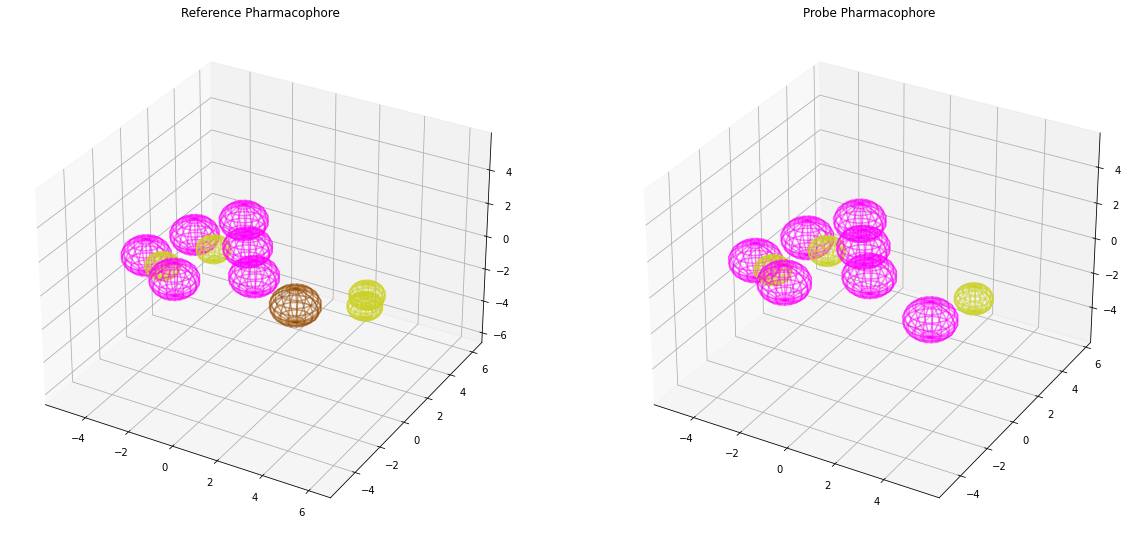

In [10]:
fig = plt.figure(figsize=(20, 10))

# Draw reference
ax = fig.add_subplot(1, 2, 1, projection='3d')
pyalignit.draw_pharmacophore(ref_pharm, ax)
ax.title.set_text("Reference Pharmacophore")

# Draw probe
ax = fig.add_subplot(1, 2, 2, projection='3d')
pyalignit.draw_pharmacophore(probe_pharm, ax)
ax.title.set_text("Probe Pharmacophore")

fig;

And together (aligned):

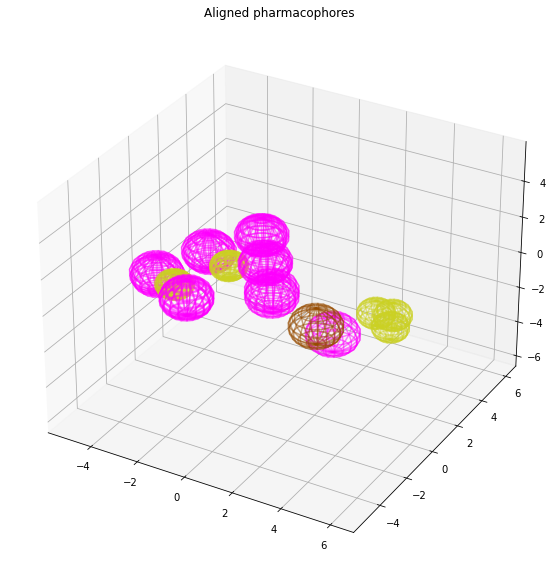

In [11]:
fig = plt.figure(figsize=(10, 10))
pyalignit.draw_pharmacophore(ref_pharm)
pyalignit.draw_pharmacophore(probe_pharm)
plt.title("Aligned pharmacophores")
fig;

As mentioned an alignment can be built from the pharmacophores themselves. Optionally the probe molecule can also be provided for the transformation to be applied:

In [12]:
# This time do not include the normals in the calculation
(tanimoto, tversky_ref, tversky_probe) = pyalignit.AlignPharmacophore(ref_pharm, probe_pharm, probeMol=probe, useNormals=False)

print(f"TANIMOTO: {tanimoto}\nTVERSKY_REF: {tversky_ref}\nTVERSKY_PROBE: {tversky_probe}")

TANIMOTO: 0.783739058046079
TVERSKY_REF: 0.8245128851044611
TVERSKY_PROBE: 0.9406474449993792


Pharmacophores can also be written/read to/from files:

In [13]:
# Create writer
writer = pyalignit.PharmacophoreWriter('out.phar')

# Write pharmacophores
writer.write(ref_pharm)
writer.write(probe_pharm)

# Close file
writer.close()

In [14]:
# Create supplier (lazy reader)
suppl = pyalignit.PharmacophoreSupplier('out.phar')

# Retrieve the pharmacophores 
for pharm in suppl:
    print(pharm)